### Python Basics

#### **TASK 1:** Create an If...Else statement that will test whether a number is divisible by three. "YOUR VALUE is divisible by 3" should be printed if the value is divisible by three. 

In [3]:
num1=int(input("Test whether your number is divisible by three. What is your number?"))
if(num1%3==0):
    print("{} is divisible by 3".format(num1))
else:
    print("{} is not divisible by 3".format(num1))

Test whether your number is divisible by three. What is your number? 5


5 is not divisible by 3


#### **TASK 2:** Create an If...Else statement that will test whether a type of fruit, represented as a text string, is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the following should be printed: "YOUR FRUIT is acceptable."

In [4]:
fruit = input("What is your fruit?")

acceptablefruits = ["apple", "orange", "pear", "kiwi", "strawberry",
                    "Apple", "Orange", "Pear", "Kiwi", "Strawberry",
                    "APPLE", "ORANGE", "PEAR", "KIWI", "STRAWBERRY"] #added in various capitilizations to avoid discrepencies 

if fruit in acceptablefruits:
    print(str(fruit) + " is accetable.")
else: 
    print(str(fruit) + " is not acceptable.")

What is your fruit? pineapple


pineapple is not acceptable.


#### **TASK 3:** Create a function to calculate the distance between two coordinates using the haversine formula. Write the following formula where the input parameters are a pair of coordinates as two lists.

### Pandas and NumPy

In [1]:
import numpy as np #simplifying code 
import pandas as pd #simplifying code

In [2]:
trees = pd.read_csv('portland_park_trees.csv', index_col=0, sep=",", header=0) #reading in csv file
trees.head(5) #checking it is imported correctly, getting head
trees.shape

(25534, 39)

#### **QUESTION 1:**  How many trees are of the Quercus or Acer genus?

##### **Quercus genus**

In [5]:
Quercus = (trees['Genus'] == 'Quercus') #subsetting
trees.loc[Quercus]
Quercus.sum() #simple sum statement

2089

##### There are 2089 recorded trees from the Quercus genus.

##### **Acer genus**

In [7]:
Acer = (trees['Genus'] == 'Acer')
trees.loc[Acer]
Acer.sum()

3586

##### There are 3586 recorded trees from the Acer genus.

#### **QUESTION 2:** How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

##### **Quercus genus**

In [8]:
quercusDBH = trees [(trees["Genus"]=="Quercus") & (trees["DBH"]>50)][["Genus", "DBH"]]
print(quercusDBH)
quercusDBH.count()

         Genus   DBH
fid                 
1702   Quercus  51.5
2020   Quercus  58.5
2023   Quercus  54.1
2035   Quercus  68.3
2047   Quercus  57.9
...        ...   ...
19516  Quercus  53.5
19524  Quercus  59.4
21834  Quercus  56.4
24272  Quercus  69.9
24462  Quercus  59.0

[80 rows x 2 columns]


Genus    80
DBH      80
dtype: int64

##### There are 80 trees from the Quercus genus that also have a DBH larger than 50 inches.

##### **Acer genus**

In [9]:
acerDBH = trees [(trees["Genus"]=="Acer") & (trees["DBH"]>50)][["Genus", "DBH"]]
print(acerDBH)
acerDBH.count()

      Genus   DBH
fid              
128    Acer  50.5
153    Acer  50.5
155    Acer  52.7
163    Acer  56.3
594    Acer  50.9
596    Acer  53.0
681    Acer  52.7
815    Acer  53.5
840    Acer  53.5
1937   Acer  51.6
3078   Acer  52.7
3117   Acer  59.2
3128   Acer  52.6
3130   Acer  50.3
3218   Acer  58.0
3233   Acer  53.3
3248   Acer  55.0
3252   Acer  58.0
3254   Acer  65.0
5424   Acer  65.9
6160   Acer  50.1
6410   Acer  73.0
8917   Acer  54.0
12330  Acer  60.0
12337  Acer  58.4
12339  Acer  61.1
12397  Acer  62.8
15848  Acer  55.1
17244  Acer  54.8
18123  Acer  54.3
19710  Acer  56.5
19895  Acer  54.0
20168  Acer  52.4
20225  Acer  56.3
20236  Acer  66.7
20656  Acer  53.7
23319  Acer  51.0
23482  Acer  59.4
23870  Acer  59.3
23893  Acer  63.7
23933  Acer  55.8
23958  Acer  59.5
25500  Acer  84.5
25507  Acer  63.0


Genus    44
DBH      44
dtype: int64

##### There are 44 trees from the Acer genus that also have a DBH larger than 50 inches.

#### **QUESTION 3:** Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

##### **Quercus genus**

In [11]:
quercusDBHmean = ['Quercus'] #subsetting
trees["DBH"][trees['Genus'].isin(quercusDBHmean)].mean() #getting mean from within that subset

23.56823839157492

##### The mean DBH of the Quercus genus is 23.568 inches.

##### **Acer genus**

In [12]:
acerDBHmean = ['Acer'] 
trees["DBH"][trees['Genus'].isin(acerDBHmean)].mean()

18.419085331846066

##### The mean DBH of the Acer genus is 23.568 inches.

##### **Fraxinus genus**

In [13]:
fraxinusDBHmean = ['Fraxinus'] 
trees["DBH"][trees['Genus'].isin(fraxinusDBHmean)].mean()

11.033609693877551

##### The mean DBH of the Fraxinus genus is 11.034 inches.

#### **QUESTION 4:** How many different species of trees are recorded in the Acer genus?

In [14]:
acerspp_genus = pd.DataFrame(trees)
trees['Genus'] = trees['Genus_spec'].str.split(' ', expand=True)[0] #dividing Genus_spec to distinguish just Acer spp. within column
subset_acer = 'Acer'
acer_subset = trees[trees['Genus'] == subset_acer] #subsetting . . .
dif_acerspp = acer_subset['Genus_spec'].nunique() #getting rid of duplicate genus spp. within subset
print(dif_acerspp) #printing

20


##### There are 20 distinct species within the Acer genus.

#### **QUESTION 5:** Various questions based upon the world_cities.csv file . . .

In [15]:
cities = pd.read_csv('world_cities.csv', index_col=0, sep=",", header=0) #reading in csv file
cities.head(5) #checking it is imported correctly, getting head

,country,pop,lat,lon,capital
city,,,,,
'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
'Abdul Hakim,Pakistan,47788,30.55,72.11,0
'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
'Abud,Palestine,2456,32.03,35.07,0


In [16]:
cities.shape

(43645, 5)

##### Calculating new column named "pop_M" (population in millions), by transforming the "pop" (population) column.

In [17]:
cities["pop_M"] = cities["pop"] * 0.000001 #thousands into millions . . .
cities.head(5) #checking column was successfully created

,country,pop,lat,lon,capital,pop_M
city,,,,,,
'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0,0.005629
'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0,0.018999
'Abdul Hakim,Pakistan,47788,30.55,72.11,0,0.047788
'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0,0.021817
'Abud,Palestine,2456,32.03,35.07,0,0.002456


##### Removing the original 'pop' columndel cities['pop']
cities.head(5)


In [18]:
del cities['pop'] #simple deletion . . .
cities.head(5) #checking column was deleted

,country,lat,lon,capital,pop_M
city,,,,,
'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
'Abud,Palestine,32.03,35.07,0,0.002456


##### Choosing a city that starts with the first letter of my first name

In [19]:
print("Santa Isabel Information")
display(cities.iloc[33571])

Santa Isabel Information


country     Brazil
lat          -1.29
lon         -48.16
capital          0
pop_M      0.04062
Name: Santa Isabel do Para, dtype: object

##### Subseting the five biggest (i.e., largest population sizes) cities in Brazil

In [20]:
(cities.query("country == 'Brazil'")
     .sort_values(by="pop_M", ascending=False) #ascend false to have largest pop. size first
    .head(5)) #five biggest

,country,lat,lon,capital,pop_M
city,,,,,
Sao Paulo,Brazil,-23.53,-46.63,0,10.059502
Rio de Janeiro,Brazil,-22.91,-43.20,0,6.055582
Salvador,Brazil,-12.97,-38.50,0,2.762758
Belo Horizonte,Brazil,-19.92,-43.94,0,2.399577
Fortaleza,Brazil,-3.78,-38.59,0,2.349632


##### The five largest cities in Brazil by population are Sao Paulo, Rio de Janerio, Salvador, Belo Horizonte, and Fortaleza.

### Python Data Visualization

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plt as an alias
%matplotlib inline
import seaborn as sns

In [23]:
trees = pd.read_csv('portland_park_trees.csv', index_col=0, sep=",", header=0) #reading in csv file
trees.head(1) #checking it is imported correctly, getting head

,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,Notes,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
fid,,,,,,,,,,,,,,,,,,,,,
1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,NaN,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


#### **GRAPH 1:** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis

In [24]:
ulmus = trees[trees["Genus"]=="Ulmus"] #subsetting Ulmus . . .
ulmus
ulmus.head(1) #checking if subset worked . . .

,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,Notes,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
fid,,,,,,,,,,,,,,,,,,,,,
58,483,2017/05/19,ULPU,40.5,Poor,75.0,65.0,55.0,staff,NaN,...,Ulmus,Siberian elm,Ulmus pumila,BD,L,No,NaN,Yes,"Asia - eastern Siberia, Korea, northern China,...","Resistant to Dutch elm disease, and cross bred..."


     OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  CrownWidth  \
fid                                                                         
58        483  2017/05/19    ULPU  40.5      Poor        75.0        65.0   

     CrownWid_1 CollectedB Notes  ...  Genus    Common_nam    Genus_spec  \
fid                               ...                                      
58         55.0      staff   NaN  ...  Ulmus  Siberian elm  Ulmus pumila   

    Functional Size Native Edible  Nuisance  \
fid                                           
58          BD    L     No    NaN       Yes   

                                                Origin  \
fid                                                      
58   Asia - eastern Siberia, Korea, northern China,...   

                                            Species_fa  
fid                                                     
58   Resistant to Dutch elm disease, and cross bred...  

[1 rows x 39 columns]


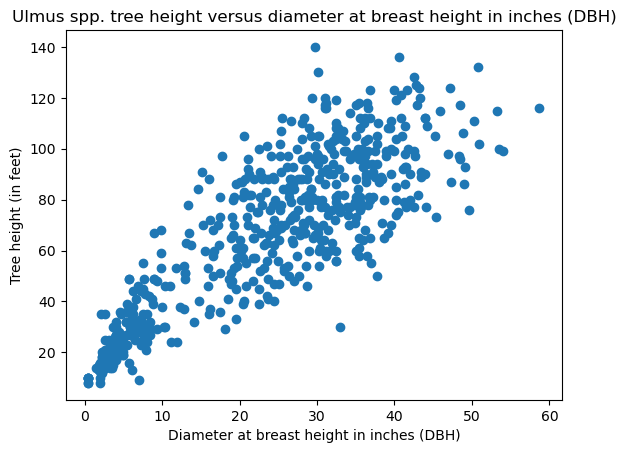

In [31]:
ulmus = trees[trees["Genus"]=="Ulmus"]
ulmus
print(ulmus.head(1))
Ulmus = (trees['Genus'] == 'Ulmus')
ulmusplot = plt.scatter(ulmus.DBH, ulmus.TreeHeight)
plt.title("Ulmus spp. tree height versus diameter at breast height in inches (DBH)")
plt.xlabel("Diameter at breast height in inches (DBH)")
plt.ylabel("Tree height (in feet)")
plt.show(ulmusplot)

#### **GRAPH 2:** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue

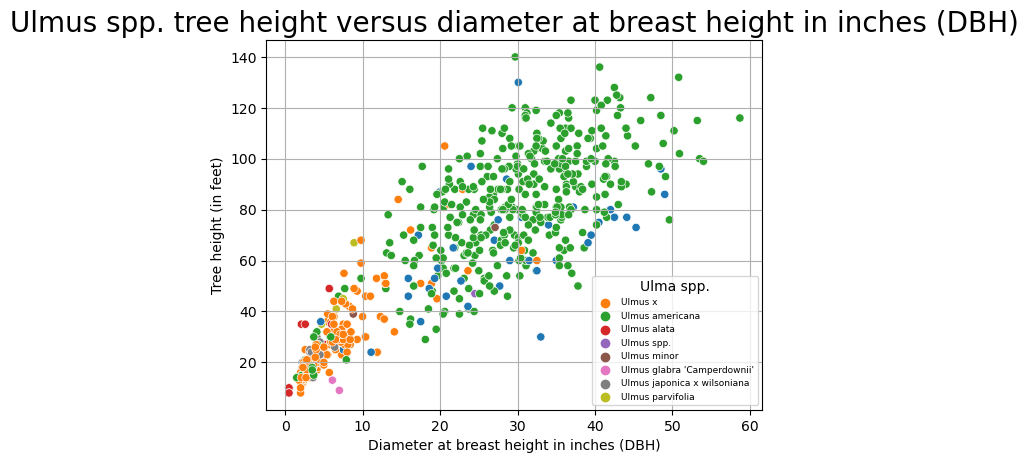

In [35]:
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="DBH", y="TreeHeight", hue="Genus_spec", data=ulmus)
axs.set_title("Ulmus spp. tree height versus diameter at breast height in inches (DBH)", fontsize=20, color="#000000")
plt.xlabel("Diameter at breast height in inches (DBH)")
plt.ylabel("Tree height (in feet)")
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles=handles[1:], labels=labels[1:], title="Ulma spp.", fontsize=6.5, title_fontsize=10)
axs.grid(True)
fig.patch.set_facecolor('#FFFFFF')
plt.show(fig)

#### **GRAPH 3:** Create a boxplot of DBH for just the Ulmus genus differentiated by species

In [37]:
ulmusgenus_df = pd.DataFrame(trees)
ulmusgenus_df['ulmusgenus'] = ulmusgenus_df['Genus_spec'].str.split(' ', expand=True)[0]
Ulmus = 'Ulmus'
ulmusboxplot = ulmusgenus_df[ulmusgenus_df['Genus_spec'] == Ulmus]
sns.boxplot(x='Genus_spec', y='DBH', data=ulmusboxplot)

ValueError: min() arg is an empty sequence

#### **GRAPH 4:** Combine Graphs 1 and 3 into a single figure.

### Python GeoPandas

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

/var/folders/jt/dlkzlbf92fl8lbck5rjvdn8w0000gn/T/ipykernel_66404/2684456056.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


#### **TASK 1:** Read the selected dataset as GeoPandas DataFrame

In [52]:
stat = gpd.read_file('BAREPEATRS_SCOTLAND.shp')
stat.head()

,ID,GRIDCODE,geometry
0,120,1,"POLYGON ((142630.000 957400.000, 142620.000 95..."
1,121,1,"POLYGON ((148490.000 957400.000, 148480.000 95..."
2,122,1,"POLYGON ((142630.000 957400.000, 142640.000 95..."
3,123,1,"POLYGON ((148590.000 957390.000, 148580.000 95..."
4,124,1,"POLYGON ((142550.000 957370.000, 142540.000 95..."


In [50]:
stat.tail()

,ID,GRIDCODE,geometry
48571,11584,1,"POLYGON ((299240.000 775460.000, 299230.000 77..."
48572,11585,1,"POLYGON ((341170.000 775490.000, 341170.000 77..."
48573,11586,1,"POLYGON ((341220.000 775460.000, 341200.000 77..."
48574,11587,1,"POLYGON ((344810.000 775460.000, 344800.000 77..."
48575,11589,1,"POLYGON ((299200.000 775450.000, 299200.000 77..."


#### **TASK 2:** Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

#### **TASK 3:** Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip.

In [ ]:
#### **TASK 4:**

In [ ]:
#### **TASK 5:**

In [ ]:
#### **TASK 6:**

In [ ]:
#### **TASK 7:**

In [ ]:
#### **TASK 8:**